In [ ]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
#from pdpbox import pdp, 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
RANDOM_SEED = 42

In [ ]:
#Loading training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Customer Transaction Prediction/test.csv')

In [ ]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X,y, random_state = 1)

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 12 kB/s 


In [ ]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=5000, learning_rate=0.02, max_depth=2, loss_function='Logloss')
model.fit(x_train, y_train,eval_set=(x_val, y_val),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6143346	test: 0.6138674	best: 0.6138674 (4)	total: 521ms	remaining: 8m 40s
5:	learn: 0.6006121	test: 0.6000523	best: 0.6000523 (5)	total: 604ms	remaining: 8m 22s
6:	learn: 0.5876433	test: 0.5870119	best: 0.5870119 (6)	total: 709ms	remaining: 8m 25s
7:	learn: 0.5752740	test: 0.5745644	best: 0.5745644 (7)	total: 804ms	remaining: 8m 21s
8:	learn: 0.5635877	test: 0.5627926	best: 0.5627926 (8)	total: 902ms	remaining: 8m 19s
9:	learn: 0.5523529	test: 0.5514797	best: 0.5514797 (9)	total: 1.03s	remaining: 8m 34s
10:	learn: 0.5417768	test: 0.5408239	best: 0.5408239 (10)	total: 1.13s	remaining: 8m 30s
11:	learn: 0.5317313	test: 0.5307028	best: 0.5307028 (11)	total: 1.23s	remaining: 8m 29s
12:	learn: 0.5219998	test: 0.5208956	best: 0.5208956 (12)	total: 1.32s	remaining: 8m 26s
13:	learn: 0.5128484	test: 0.5116820	best: 0.5116820 (13)	total: 1.43s	remaining: 8m 28s
14:	learn: 0.5040991	test: 0.5028669	best: 0.5028669 (14)	total: 1.54s	

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
train_auc = roc_auc_score(y_train,train_predict)

In [ ]:
train_auc

0.6267603422476132

In [ ]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    134845
           1       0.86      0.26      0.40     15155

    accuracy                           0.92    150000
   macro avg       0.89      0.63      0.68    150000
weighted avg       0.92      0.92      0.90    150000



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_train,train_predict)

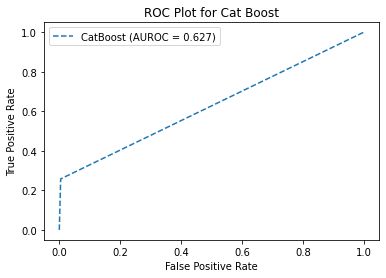

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %train_auc)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
val_predict =model.predict(x_val)

In [ ]:
val_score = roc_auc_score(y_val,val_predict)

In [ ]:
val_score

0.6195864719668078

In [ ]:
print(classification_report(y_val, val_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     45057
           1       0.83      0.24      0.38      4943

    accuracy                           0.92     50000
   macro avg       0.88      0.62      0.67     50000
weighted avg       0.91      0.92      0.90     50000



In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,val_predict)

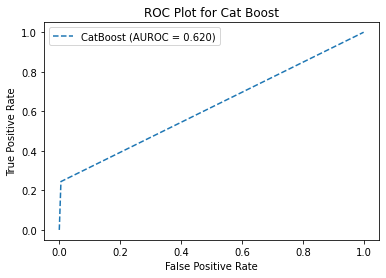

In [ ]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'CatBoost (AUROC = %0.3f)' %val_score)
plt.title('ROC Plot for Cat Boost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()